<a href="https://colab.research.google.com/github/IAMKK28-03-04/Kushal/blob/main/Assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/auto-mpg.csv')
print(df)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000   

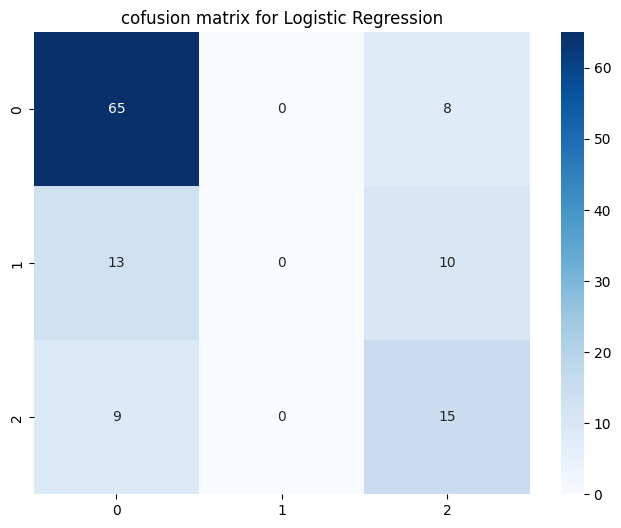

In [ ]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

df=pd.read_csv('/content/auto-mpg.csv')

x=df[['weight','model year']]
y=df['origin']

print(df.info())
print(df.describe())
print(df.isna().sum())
print(df.shape)

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

y_test_binary = (y_test > y_test.mean()).astype(int)
accuracy_best = accuracy_score(y_test_binary, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)

model=LogisticRegression(solver='liblinear', max_iter=10000)
lr=model.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

print('y_pred_lr:',y_pred_lr)
print("r2_s:",r2_score(y_test, y_pred_lr))
print("mse:",mean_squared_error(y_test, y_pred_lr))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_lr))}")
cm=confusion_matrix(y_test, y_pred_lr)
print("cm:",cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('cofusion matrix for Logistic Regression')
plt.show()

y_pred_svc: [3 1 1 1 1 3 1 1 1 1 1 3 3 1 1 1 1 1 1 3 1 1 1 3 1 3 3 1 1 1 1 3 1 3 3 1 1
 1 1 3 1 3 1 1 1 3 3 1 3 3 3 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 3 3 1 3 1 1 1
 1 1 1 1 3 1 1 3 3 3 1 1 3 3 3 1 1 3 3 3 1 3 1 1 1 1 3 3 1 1 1 1 3 1 3 3 3
 1 1 3 1 3 3 1 3 1]
r2_s: -0.026085074142223164
mse: 0.6583333333333333
rmse:0.811377429642539
cr:               precision    recall  f1-score   support

           1       0.85      0.85      0.85        73
           2       0.00      0.00      0.00        23
           3       0.45      0.88      0.59        24

    accuracy                           0.69       120
   macro avg       0.43      0.57      0.48       120
weighted avg       0.61      0.69      0.63       120

cm1: [[62  0 11]
 [ 8  0 15]
 [ 3  0 21]]
y_pred_svr: [2.3931702  1.48019706 1.47137995 0.90285283 0.93926108 2.05317085
 1.26584268 1.04367908 0.91344549 1.2578512  0.89958734 2.20665685
 2.21785139 0.90056078 1.56346213 1.09130804 1.52988689 1.07864875
 0.93636769 2.20103035 1.595

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


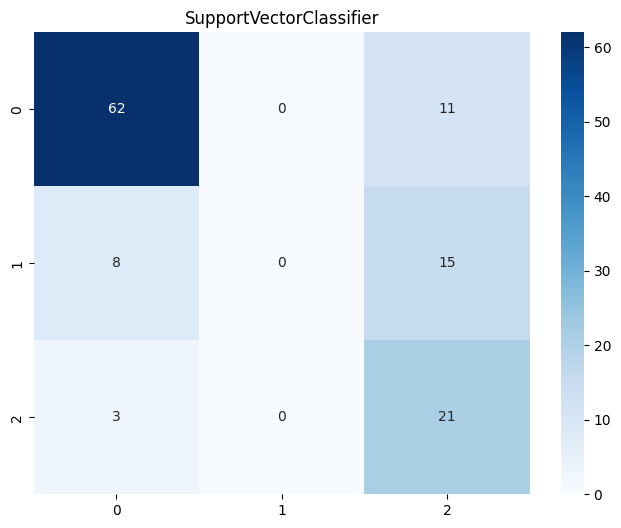

In [ ]:
from sklearn.svm import SVC, SVR

model1=SVC(kernel='poly')
svc=model1.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)
print('y_pred_svc:',y_pred_svc)
print("r2_s:",r2_score(y_test, y_pred_svc))
print("mse:",mean_squared_error(y_test, y_pred_svc))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_svc))}")
print("cr:",classification_report(y_test, y_pred_svc))
cm1=confusion_matrix(y_test, y_pred_svc)
print("cm1:",cm1)

model2=SVR(kernel='rbf')
svr=model2.fit(x_train, y_train)
y_pred_svr=svr.predict(x_test)
print('y_pred_svr:',y_pred_svr)
print("r2_s:",r2_score(y_test, y_pred_svr))
print("mse:",mean_squared_error(y_test, y_pred_svr))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_svr))}")

plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('SupportVectorClassifier')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, StackingClassifier, StackingRegressor

estimators = [('lr', lr), ('svc', svc), ('rfc', rfc)]

ensemble_voting = VotingClassifier(estimators=estimators, voting='hard')
ensemble_voting.fit(x_train, y_train)
y_pred_voting = ensemble_voting.predict(x_test)
print('Voting Classifier Accuracy:', accuracy_score(y_test, y_pred_voting))

ensemble_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=2)
ensemble_stacking.fit(x_train, y_train)
y_pred_stacking = ensemble_stacking.predict(x_test)
print('Stacking Classifier Accuracy:', accuracy_score(y_test, y_pred_stacking))

ensemble_bagging = BaggingClassifier(estimator=dtc, n_estimators=10)
ensemble_bagging.fit(x_train, y_train)
y_pred_bagging = ensemble_bagging.predict(x_test)
print('Bagging Classifier Accuracy:', accuracy_score(y_test, y_pred_bagging))


blend_df = pd.DataFrame({'lr': y_pred_lr, 'svc': y_pred_svc, 'svr': np.round(y_pred_svr)})
blend_pred = blend_df.mode(axis=1)[0]
print('Blended Model Accuracy:', accuracy_score(y_test, blend_pred))


ensemble_adaboost = AdaBoostClassifier(estimator=dtc, n_estimators=50)
ensemble_adaboost.fit(x_train, y_train)
y_pred_adaboost = ensemble_adaboost.predict(x_test)
print('AdaBoost Classifier Accuracy:', accuracy_score(y_test, y_pred_adaboost))

Voting Classifier Accuracy: 0.6833333333333333
Stacking Classifier Accuracy: 0.6833333333333333
Bagging Classifier Accuracy: 0.6666666666666666
Blended Model Accuracy: 0.6666666666666666
AdaBoost Classifier Accuracy: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


y_pred_rfc: [2 1 1 1 1 2 1 1 1 1 1 3 2 1 3 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 3 1 3 3 1 1
 1 1 2 1 3 1 1 1 1 2 3 3 3 1 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 2 3 3 1 3 1 1 1
 1 1 1 1 2 1 1 2 3 2 3 1 2 1 1 1 1 3 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 3 3 2
 1 1 3 1 1 1 1 1 1]
r2_s: 0.051845437817945594
mse: 0.6083333333333333
rmse:0.779957263786506
c_r:               precision    recall  f1-score   support

           1       0.78      0.88      0.83        73
           2       0.31      0.22      0.26        23
           3       0.50      0.46      0.48        24

    accuracy                           0.67       120
   macro avg       0.53      0.52      0.52       120
weighted avg       0.63      0.67      0.65       120

a_s: 0.6666666666666666
p_s: 0.634692581300813
r_s: 0.5174789888160942
f1_s: 0.6666666666666666
cm2: [[64  5  4]
 [11  5  7]
 [ 7  6 11]]
y_pred_rfr: [2.594      1.33966667 1.42686667 1.014      1.         1.915
 1.558      1.         1.         1.594      1.005      2.672
 2.04    

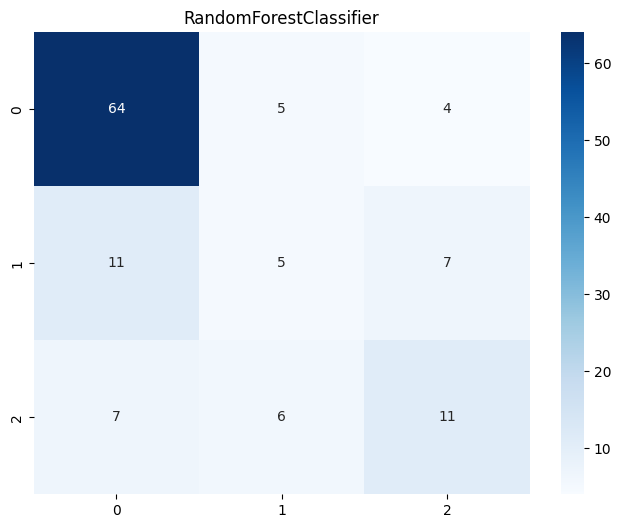

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

model5=RandomForestClassifier( n_estimators=100, criterion = "gini", min_samples_split = 2,  random_state = 42,  min_samples_leaf = 1, n_jobs=1, max_depth=None)
rfc=model5.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)
print('y_pred_rfc:',y_pred_rfc)
print("r2_s:",r2_score(y_test, y_pred_rfc))
print("mse:",mean_squared_error(y_test, y_pred_rfc))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_rfc))}")
print("c_r:",classification_report(y_test, y_pred_rfc))
print("a_s:",accuracy_score(y_test, y_pred_rfc))
print("p_s:",precision_score(y_test, y_pred_rfc, average='weighted'))
print("r_s:",recall_score(y_test, y_pred_rfc, average='macro'))
print("f1_s:",f1_score(y_test, y_pred_rfc, average='micro'))
cm2=confusion_matrix(y_test, y_pred_rfc)
print("cm2:",cm2)

model6=RandomForestRegressor( n_estimators=1000)
rfr=model6.fit(x_train, y_train)
y_pred_rfr=rfr.predict(x_test)
print('y_pred_rfr:',y_pred_rfr)
print("r2_s:",r2_score(y_test, y_pred_rfr))
print("mse:",mean_squared_error(y_test, y_pred_rfr))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_rfr))}")

plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('RandomForestClassifier')
plt.show()

In [2]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/world cup matches - Sheet1.csv')
print(df1)

     Year             Datetime                     Stage              Stadium  \
0    1930  13 Jul 1930 - 15:00                   Group 1              Pocitos   
1    1930  13 Jul 1930 - 15:00                   Group 4       Parque Central   
2    1930  14 Jul 1930 - 12:45                   Group 2       Parque Central   
3    1930  14 Jul 1930 - 14:50                   Group 3              Pocitos   
4    1930  15 Jul 1930 - 16:00                   Group 1       Parque Central   
..    ...                  ...                       ...                  ...   
847  2014  05 Jul 2014 - 17:00            Quarter-finals     Arena Fonte Nova   
848  2014  08 Jul 2014 - 17:00               Semi-finals     Estadio Mineirao   
849  2014  09 Jul 2014 - 17:00               Semi-finals   Arena de Sao Paulo   
850  2014  12 Jul 2014 - 17:00  Play-off for third place     Estadio Nacional   
851  2014  13 Jul 2014 - 16:00                     Final  Estadio do Maracana   

    Home Team Name  Home Te

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   Home Team Name        852 non-null    object 
 5   Home Team Goals       852 non-null    int64  
 6   Away Team Goals       852 non-null    int64  
 7   Attendance            850 non-null    float64
 8   Half-time Home Goals  852 non-null    int64  
 9   Half-time Away Goals  852 non-null    int64  
 10  RoundID               852 non-null    int64  
 11  MatchID               852 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 80.0+ KB
None
              Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Best Params: {'C': 10}
Optimized Accuracy: 0.58984375
y_pred_lr: [4 0 1 0 0 1 3 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 2 0 0 0 0 1 0 0 2
 2 1 0 0 2 0 0 1 0 1 0 2 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 2 0 1 2 1 0 1 1
 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 2 2 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 2 0
 2 1 1 1 1 0 0 0 1 1 0 0 0 0 0 2 1 1 0 1 0 3 1 0 1 0 0 2 3 1 0 3 1 0 0 1 0
 0 1 0 1 0 1 2 0 0 3 1 0 0 0 0 0 2 0 2 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0
 2 0 1 1 0 0 0 0 2 1 0 1 0 0 2 0 0 2 0 1 0 1 0 0 0 4 0 0 1 0 1 2 1 1 2 0 2
 0 2 0 0 0 0 0 2 0 1 0 2 1 0 0 1 0 0 1 0 2 0 0 3 0 0 0 1 1 1 2 1 2 1]
r2_s: 0.33403170612472943
mse: 0.58203125
rmse:0.7629097259833564
cm: [[103  35   2   0   0]
 [ 31  34  12   1   1]
 [  0  10  10   1   0]
 [  0   6   2   3   0]
 [  0   0   3   1   1]]


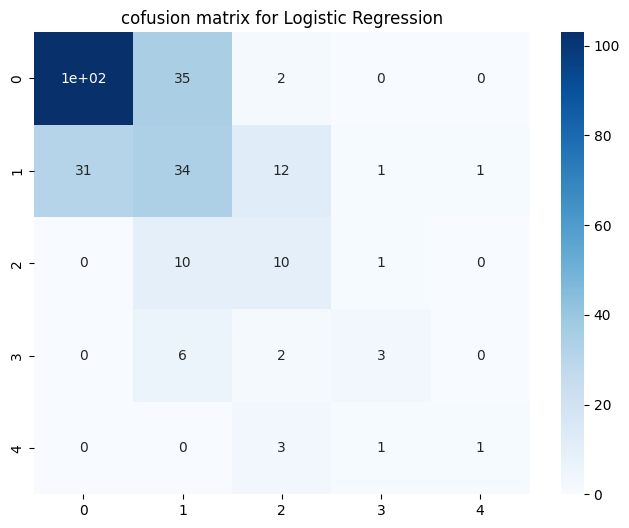

In [13]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

df1=pd.read_csv('/content/world cup matches - Sheet1.csv')

x=df1[['Away Team Goals','Home Team Goals']]
y=df1['Half-time Home Goals']

print(df1.info())
print(df1.describe())
print(df1.isna().sum())
print(df1.shape)

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Optimized Accuracy:", grid_search.score(x_test, y_test))

model=LogisticRegression(solver='lbfgs', max_iter=10)
lr=model.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

print('y_pred_lr:',y_pred_lr)
print("r2_s:",r2_score(y_test, y_pred_lr))
print("mse:",mean_squared_error(y_test, y_pred_lr))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_lr))}")
cm=confusion_matrix(y_test, y_pred_lr)
print("cm:",cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('cofusion matrix for Logistic Regression')
plt.show()

y_pred_svc: [4 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 3 0 0 0 0 0 2 2 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0 1 0 1 0 0 0 4 0 0 1 0 0 2 0 0 1 0 1
 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 1 0 2 0 1 1]
r2_s: 0.12396117047279842
mse: 0.765625
rmse:0.875
cr:               precision    recall  f1-score   support

           0       0.65      0.94      0.77       140
           1       0.49      0.22      0.30        79
           2       0.38      0.24      0.29        21
           3       0.33      0.09      0.14        11
           4       0.50      0.20      0.29         5

    accuracy                           0.61       256
   macro avg       0.47      0.34

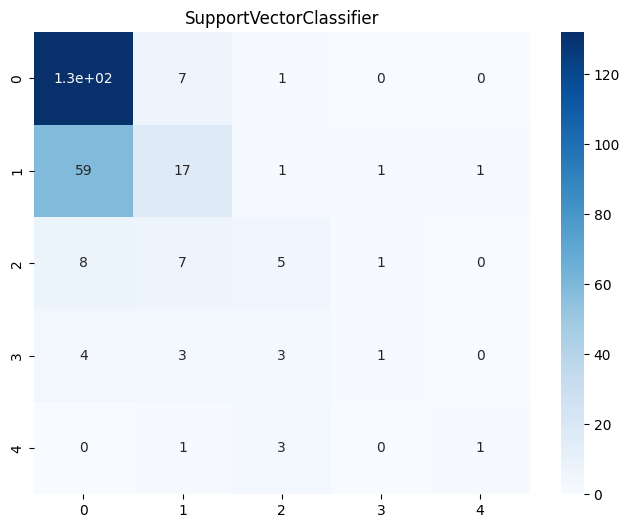

In [14]:
from sklearn.svm import SVC, SVR

model1=SVC(kernel='poly')
svc=model1.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)
print('y_pred_svc:',y_pred_svc)
print("r2_s:",r2_score(y_test, y_pred_svc))
print("mse:",mean_squared_error(y_test, y_pred_svc))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_svc))}")
print("cr:",classification_report(y_test, y_pred_svc))
cm1=confusion_matrix(y_test, y_pred_svc)
print("cm1:",cm1)

model2=SVR(kernel='rbf')
svr=model2.fit(x_train, y_train)
y_pred_svr=svr.predict(x_test)
print('y_pred_svr:',y_pred_svr)
print("r2_s:",r2_score(y_test, y_pred_svr))
print("mse:",mean_squared_error(y_test, y_pred_svr))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_svr))}")

plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('SupportVectorClassifier')
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, StackingClassifier, StackingRegressor

dtc=DecisionTreeClassifier()

estimators = [('lr', lr), ('svc', svc), ('rfc', rfc)]

ensemble_voting = VotingClassifier(estimators=estimators, voting='hard')
ensemble_voting.fit(x_train, y_train)
y_pred_voting = ensemble_voting.predict(x_test)
print('Voting Classifier Accuracy:', accuracy_score(y_test, y_pred_voting))

ensemble_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=2)
ensemble_stacking.fit(x_train, y_train)
y_pred_stacking = ensemble_stacking.predict(x_test)
print('Stacking Classifier Accuracy:', accuracy_score(y_test, y_pred_stacking))

ensemble_bagging = BaggingClassifier(estimator=dtc, n_estimators=10)
ensemble_bagging.fit(x_train, y_train)
y_pred_bagging = ensemble_bagging.predict(x_test)
print('Bagging Classifier Accuracy:', accuracy_score(y_test, y_pred_bagging))


blend_df = pd.DataFrame({'lr': y_pred_lr, 'svc': y_pred_svc, 'svr': np.round(y_pred_svr)})
blend_pred = blend_df.mode(axis=1)[0]
print('Blended Model Accuracy:', accuracy_score(y_test, blend_pred))


ensemble_adaboost = AdaBoostClassifier(estimator=dtc, n_estimators=50)
ensemble_adaboost.fit(x_train, y_train)
y_pred_adaboost = ensemble_adaboost.predict(x_test)
print('AdaBoost Classifier Accuracy:', accuracy_score(y_test, y_pred_adaboost))

Voting Classifier Accuracy: 0.6171875


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1415: RuntimeWarning: Number of classes in training fold (5) does not match total number of classes (7). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1415: RuntimeWarning: Number of classes in training fold (5) does not match total number of classes (7). Results may not be appropriate for your use case. To fix this, use a cross-validation technique re

Stacking Classifier Accuracy: 0.546875
Bagging Classifier Accuracy: 0.6171875
Blended Model Accuracy: 0.5859375


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.61328125


y_pred_rfc: [4 1 0 0 0 1 2 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 2 0 0 1 0 0 0 0 1
 1 0 0 0 2 0 0 1 0 1 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 1 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 3 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 3 0
 3 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 3 0 0 1 0 0 3 3 0 0 3 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 2 0 0 0 0 0 0 2 0 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 1 0 0 0 0 0 2 0 0 1 0 0 2 0 0 1 0 1 1 1 0 0 0 4 0 0 1 0 0 3 0 1 0 0 0
 0 3 0 0 0 0 0 2 0 1 0 2 1 0 0 1 0 0 1 0 1 0 0 3 0 0 0 0 1 1 1 0 0 1]
r2_s: 0.20888330190655768
mse: 0.69140625
rmse:0.8315084184781294
c_r:               precision    recall  f1-score   support

           0       0.71      0.87      0.78       140
           1       0.47      0.35      0.40        79
           2       0.17      0.10      0.12        21
           3       0.27      0.27      0.27        11
           4       0.50      0.20      0.29         5

    accuracy                           0.61       256
   macro avg     

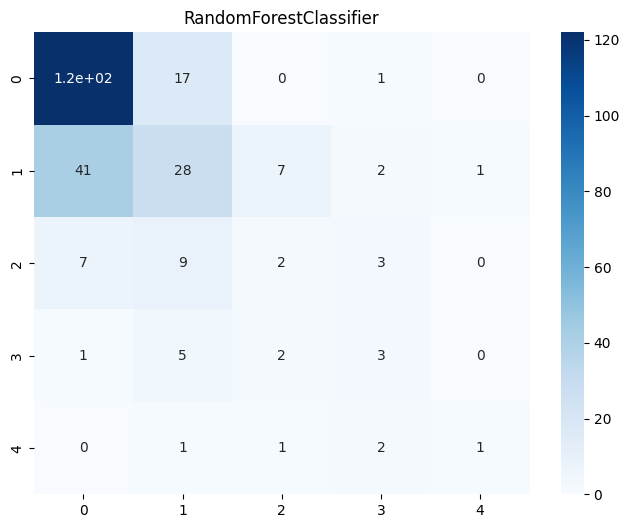

In [16]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

model5=RandomForestClassifier( n_estimators=100, criterion = "gini", min_samples_split = 2,  random_state = 42,  min_samples_leaf = 1, n_jobs=1, max_depth=None)
rfc=model5.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)
print('y_pred_rfc:',y_pred_rfc)
print("r2_s:",r2_score(y_test, y_pred_rfc))
print("mse:",mean_squared_error(y_test, y_pred_rfc))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_rfc))}")
print("c_r:",classification_report(y_test, y_pred_rfc))
print("a_s:",accuracy_score(y_test, y_pred_rfc))
print("p_s:",precision_score(y_test, y_pred_rfc, average='weighted'))
print("r_s:",recall_score(y_test, y_pred_rfc, average='macro'))
print("f1_s:",f1_score(y_test, y_pred_rfc, average='micro'))
cm2=confusion_matrix(y_test, y_pred_rfc)
print("cm2:",cm2)

model6=RandomForestRegressor( n_estimators=1000)
rfr=model6.fit(x_train, y_train)
y_pred_rfr=rfr.predict(x_test)
print('y_pred_rfr:',y_pred_rfr)
print("r2_s:",r2_score(y_test, y_pred_rfr))
print("mse:",mean_squared_error(y_test, y_pred_rfr))
print(f"rmse:{math.sqrt(mean_squared_error(y_test, y_pred_rfr))}")

plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('RandomForestClassifier')
plt.show()